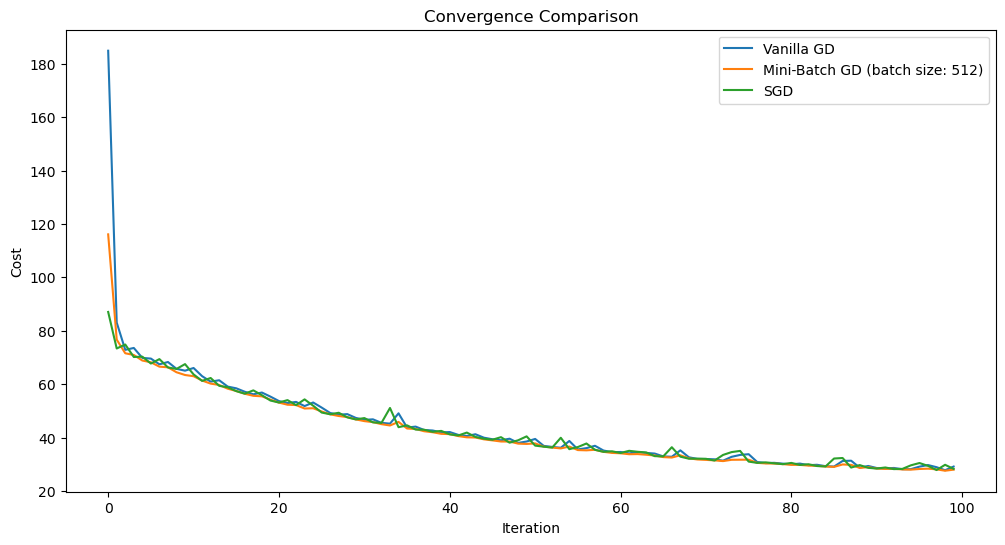

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for the experiment (replace with your own dataset)
np.random.seed(0)
X = 2 * np.random.rand(1500, 15)
#y = 4 + 3 *X.dot(X, np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])) + np.random.randn(1500)
#y = 4 +3 * X.dot(np.random.randn(15))+ np.random.normal(0, 5, size=(1500))
y = 4 + 3 * X.dot(np.random.randn(15))+ np.random.normal(0,5,size=(1500))

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 100

# Initial parameters
theta = np.random.randn(15)

# Lists to store the cost at each iteration
cost_history_vanilla = []
cost_history_mini_batch = []
cost_history_sgd = []

# Define batch size for mini-batch gradient descent
batch_size = 512  # You can experiment with different batch sizes

# Implementing Gradient Descent Methods
for iteration in range(n_iterations):
    # Vanilla Gradient Descent
    gradients_vanilla = (1 / len(y)) * np.dot(X.T, np.dot(X, theta) - y)
    theta -= learning_rate * gradients_vanilla
    cost_vanilla = np.mean((np.dot(X, theta) - y) ** 2)
    cost_history_vanilla.append(cost_vanilla)

    # Mini-Batch Gradient Descent
    for _ in range(0, len(y), batch_size):
        random_indices = np.random.randint(len(y), size=batch_size)
        X_batch = X[random_indices]
        y_batch = y[random_indices]
        gradients_mini_batch = (1 / batch_size) * np.dot(X_batch.T, np.dot(X_batch, theta) - y_batch)
        theta -= learning_rate * gradients_mini_batch
    cost_mini_batch = np.mean((np.dot(X, theta) - y) ** 2)
    cost_history_mini_batch.append(cost_mini_batch)

    # Stochastic Gradient Descent (SGD)
    random_index = np.random.randint(len(y))
    X_sgd = X[random_index]
    y_sgd = y[random_index]
    gradient_sgd = np.dot(X_sgd, theta) - y_sgd
    theta -= learning_rate * gradient_sgd
    cost_sgd = np.mean((np.dot(X, theta) - y) ** 2)
    cost_history_sgd.append(cost_sgd)

# Plot the convergence curves
plt.figure(figsize=(12, 6))
plt.plot(range(n_iterations), cost_history_vanilla, label="Vanilla GD")
plt.plot(range(n_iterations), cost_history_mini_batch, label=f"Mini-Batch GD (batch size: {batch_size})")
plt.plot(range(n_iterations), cost_history_sgd, label="SGD")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.title("Convergence Comparison")
plt.show()

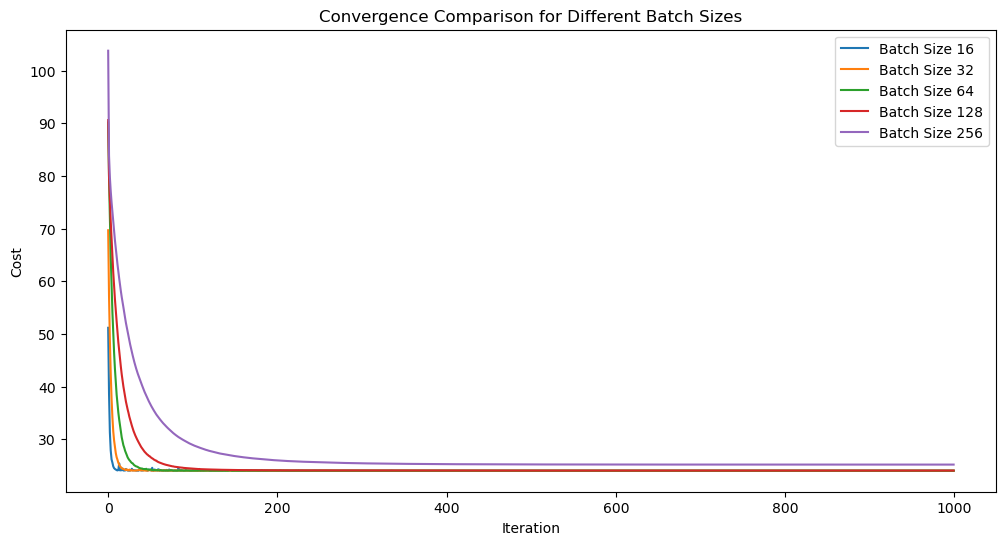

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for the experiment (replace with your own dataset)
np.random.seed(0)
X = 2 * np.random.rand(1500, 15)
y = 4 + 3 * X.dot(np.random.randn(15))+ np.random.normal(0,5,size=(1500))

# Gradient Descent Parameters
n_iterations = 1000

# Define batch sizes to experiment with
batch_sizes = [16, 32, 64, 128, 256]  # You can add more batch sizes to the list

# Dictionary to store cost histories for each batch size
cost_histories = {}

# Implement Mini-Batch Gradient Descent for different batch sizes
for batch_size in batch_sizes:
    learning_rate = 0.01  # Reset learning rate for each batch size
    theta = np.random.randn(15)
    cost_history = []

    for iteration in range(n_iterations):
        for i in range(0, len(y), batch_size):
            random_indices = np.random.randint(len(y), size=batch_size)
            X_batch = X[random_indices]
            y_batch = y[random_indices]
            gradients = (1 / batch_size) * np.dot(X_batch.T, np.dot(X_batch, theta) - y_batch)
            theta -= learning_rate * gradients

        cost = np.mean((np.dot(X, theta) - y) ** 2)
        cost_history.append(cost)

        # Adjust learning rate (optional)
        learning_rate *= 0.99  # You can experiment with different decay rates

    cost_histories[batch_size] = cost_history

# Plot the convergence curves for different batch sizes
plt.figure(figsize=(12, 6))
for batch_size, cost_history in cost_histories.items():
    plt.plot(range(n_iterations), cost_history, label=f"Batch Size {batch_size}")

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.title("Convergence Comparison for Different Batch Sizes")
plt.show()

Best Batch Size: 64
Final Loss with Best Batch Size: 0.08563883618900707


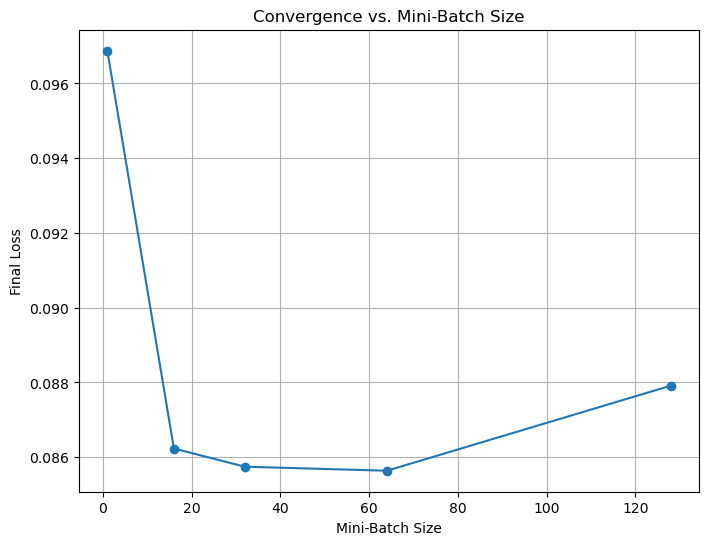

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset with 1500 rows and 15 columns
np.random.seed(42)
num_samples = 1500
num_features = 15
X = np.random.rand(num_samples, num_features)
y = np.random.rand(num_samples, 1)

# Define the loss function (mean squared error)
def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Vanilla Gradient Descent
def vanilla_gradient_descent(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape
    weights = np.random.rand(num_features, 1)
    loss_history = []
    
    for epoch in range(num_epochs):
        y_pred = X.dot(weights)
        gradient = -2 * X.T.dot(y - y_pred) / num_samples
        weights -= learning_rate * gradient
        loss = loss_function(y, y_pred)
        loss_history.append(loss)
    
    return weights, loss_history

# Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, learning_rate, batch_size, num_epochs):
    num_samples, num_features = X.shape
    weights = np.random.rand(num_features, 1)
    loss_history = []
    
    for epoch in range(num_epochs):
        for i in range(0, num_samples, batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            
            y_pred = X_batch.dot(weights)
            gradient = -2 * X_batch.T.dot(y_batch - y_pred) / batch_size
            weights -= learning_rate * gradient
        loss = loss_function(y, X.dot(weights))
        loss_history.append(loss)
    
    return weights, loss_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape
    weights = np.random.rand(num_features, 1)
    loss_history = []
    
    for epoch in range(num_epochs):
        for i in range(num_samples):
            X_sample = X[i:i+1]
            y_sample = y[i:i+1]
            
            y_pred = X_sample.dot(weights)
            gradient = -2 * X_sample.T.dot(y_sample - y_pred)
            weights -= learning_rate * gradient
        loss = loss_function(y, X.dot(weights))
        loss_history.append(loss)
    
    return weights, loss_history

# Experiment to find the optimal batch size for Mini-Batch Gradient Descent
batch_sizes = [1, 16, 32, 64, 128]
convergence_results = []

for batch_size in batch_sizes:
    _, loss_history = minibatch_gradient_descent(X, y, 0.01, batch_size, 100)
    final_loss = loss_history[-1]
    convergence_results.append((batch_size, final_loss))
 
# Find the batch size with the lowest final loss (better convergence)
best_batch_size, best_loss = min(convergence_results, key=lambda x: x[1])

# Print the results
print(f"Best Batch Size: {best_batch_size}")
print(f"Final Loss with Best Batch Size: {best_loss}")

# Plot the convergence results
batch_sizes, final_losses = zip(*convergence_results)
plt.figure(figsize=(8, 6))
plt.plot(batch_sizes, final_losses, marker='o')
plt.title('Convergence vs. Mini-Batch Size')
plt.xlabel('Mini-Batch Size')
plt.ylabel('Final Loss')
plt.grid(True)
plt.show()
